In [238]:
#GENERAL IMPORTS
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing

In [239]:
data = pd.read_excel('TrainDataset2024.xls')
data.drop('ID', inplace=True, axis=1)
data.replace(999, np.nan, inplace=True)
data.describe()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,395.000000,400.000000,400.000000,400.000000,399.000000,399.000000,399.000000,397.000000,398.000000,397.000000,...,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.212658,56.000208,51.804674,0.547500,0.406015,0.300752,0.333333,2.400504,1.575377,1.148615,...,3.957637e-01,3.911005e-01,2.722189e+00,0.003347,5.679717e+07,178.311246,32500.032620,0.056935,0.005965,0.029322
std,0.409707,27.137584,10.948522,0.498362,0.491704,0.459161,0.471996,0.500807,0.766487,0.356157,...,1.666319e-01,1.615922e-01,7.648849e-01,0.002419,7.063846e+08,1045.453432,177545.921568,0.047179,0.008379,0.115915
min,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,0.000000,38.000000,44.516769,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,3.199017e-01,3.184398e-01,2.340783e+00,0.001389,1.030473e+06,18.760570,0.001826,0.018628,0.000310,0.001464
50%,0.000000,55.000000,51.019507,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.095627e-01,4.054695e-01,2.814884e+00,0.002944,3.277334e+06,67.929659,0.004383,0.047740,0.002330,0.003276
75%,0.000000,73.000000,60.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,...,5.000049e-01,4.956920e-01,3.304411e+00,0.004798,9.079686e+06,157.370294,0.013769,0.085321,0.007962,0.009479
max,1.000000,144.000000,79.603012,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


## Removing PCR NA

In [240]:
data = data[~data['pCR (outcome)'].isna()]
print(data.isna().sum())

pCR (outcome)                    0
RelapseFreeSurvival (outcome)    0
Age                              0
ER                               0
PgR                              1
                                ..
original_ngtdm_Busyness          0
original_ngtdm_Coarseness        0
original_ngtdm_Complexity        0
original_ngtdm_Contrast          0
original_ngtdm_Strength          0
Length: 120, dtype: int64


## Median Data Imputation

In [241]:
groups = data.groupby('pCR (outcome)')
for column in data: 
    data[column] = groups[column].transform(lambda x: x.fillna(x.median()))
print(data.isna().sum())


pCR (outcome)                    0
RelapseFreeSurvival (outcome)    0
Age                              0
ER                               0
PgR                              0
                                ..
original_ngtdm_Busyness          0
original_ngtdm_Coarseness        0
original_ngtdm_Complexity        0
original_ngtdm_Contrast          0
original_ngtdm_Strength          0
Length: 120, dtype: int64


In [242]:
data.isna().sum().sum()

0

In [243]:
threshold = 3 
median = data['RelapseFreeSurvival (outcome)'].median()
mean = data['RelapseFreeSurvival (outcome)'].mean()
std = data['RelapseFreeSurvival (outcome)'].std()

indices = []

for index, value in data['RelapseFreeSurvival (outcome)'].items():
    z_test = (value - mean) / std 
    if np.abs(z_test) > threshold: 
        indices.append(index) 
        
for index in indices: 
    data.drop(index, inplace=True)
        
data.describe()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,...,3.900000e+02,3.900000e+02,3.900000e+02,390.000000,3.900000e+02,390.000000,390.000000,390.000000,390.000000,390.000000
mean,0.212821,54.612607,51.882999,0.553846,0.407692,0.302564,0.328205,2.392308,1.566667,1.146154,...,3.937734e-01,3.893549e-01,2.719453e+00,0.003307,5.818217e+07,180.351242,33333.366589,0.056834,0.005952,0.029898
std,0.409828,25.424938,11.046085,0.497731,0.492037,0.459958,0.470163,0.499298,0.761825,0.353714,...,1.677657e-01,1.626979e-01,7.721641e-01,0.002422,7.153526e+08,1058.517323,179736.066152,0.046937,0.008339,0.117335
min,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,0.000000,38.000000,44.334702,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,3.182408e-01,3.154970e-01,2.325559e+00,0.001303,1.037248e+06,18.686784,0.001811,0.018521,0.000307,0.001448
50%,0.000000,54.708333,51.242984,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.067794e-01,4.046406e-01,2.816128e+00,0.002888,3.421333e+06,69.581762,0.004350,0.047889,0.002337,0.003178
75%,0.000000,72.583333,60.225000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,...,4.967821e-01,4.921134e-01,3.304834e+00,0.004738,9.302651e+06,158.926272,0.013775,0.085482,0.008007,0.009530
max,1.000000,135.000000,79.603012,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


In [244]:
data.shape

(390, 120)

## ZScore Outlier Handling

In [245]:
def set_outliers_to_z_score_limit(series): 
    
    # Exclude target features
    outcomes = ['pCR (outcome)', 'RelapseFreeSurvival (outcome)']
    if series.name in outcomes:
        return series
    
    threshold_upper = 3 
    threshold_lower = -3
    
    mean = series.mean()
    std = series.std()
    
    replacement_upper_limit = (3 * std) + mean
    replacement_lower_limit = (-3 * std) + mean
    
    outlier_count= 0 
    for index, value in series.items():
        z_test = (value - mean) / std 
        
        if z_test > threshold_upper: 
            series[index] = replacement_upper_limit
            outlier_count+=1
            
        elif z_test < threshold_lower:
            series[index] = replacement_lower_limit
            outlier_count+=1
        
    if outlier_count > 0:
        print(f'column {series.name} had {outlier_count} outliers')
                 
    return series

# Discrete data is not affected by this function, so all features can be run through. 
data.apply(set_outliers_to_z_score_limit, axis=0)
data.reset_index(drop=True, inplace=True)


column original_shape_Elongation had 3 outliers
column original_shape_LeastAxisLength had 4 outliers
column original_shape_MajorAxisLength had 6 outliers
column original_shape_Maximum2DDiameterColumn had 6 outliers
column original_shape_Maximum2DDiameterRow had 6 outliers
column original_shape_Maximum2DDiameterSlice had 7 outliers
column original_shape_Maximum3DDiameter had 7 outliers
column original_shape_MeshVolume had 6 outliers
column original_shape_MinorAxisLength had 4 outliers
column original_shape_SurfaceArea had 4 outliers
column original_shape_SurfaceVolumeRatio had 4 outliers
column original_shape_VoxelVolume had 6 outliers
column original_firstorder_10Percentile had 3 outliers
column original_firstorder_90Percentile had 8 outliers
column original_firstorder_Energy had 2 outliers
column original_firstorder_InterquartileRange had 6 outliers
column original_firstorder_Kurtosis had 4 outliers
column original_firstorder_Maximum had 8 outliers
column original_firstorder_MeanAbsol

C:\Users\Alvin\AppData\Local\Temp\ipykernel_51164\2497015549.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '123894.86934059343' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  series[index] = replacement_upper_limit


## Skewness Handling

In [246]:
from sklearn.preprocessing import PowerTransformer


# Step 1: Identify numerical columns
numerical_columns = data.columns[data.nunique() > 10].tolist()

# Step 2: Check skewness
skewness = data[numerical_columns].skew()
print("Skewness before transformation:")
print(skewness)

# Step 3: Apply Yeo-Johnson transformation to skewed columns
# Define a threshold for skewness (e.g., absolute skewness > 1 indicates high skew)
skewed_columns = skewness[abs(skewness) > 1].index
print("\nSkewed columns:", skewed_columns)
print(len(skewed_columns))

# Apply Yeo-Johnson Transformation
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
data[skewed_columns] = transformer.fit_transform(data[skewed_columns])

# Step 4: Check skewness again
skewness_after = data[numerical_columns].skew()
print("\nSkewness after transformation:")
print(skewness_after)


Skewness before transformation:
RelapseFreeSurvival (outcome)     0.275244
Age                               0.094354
original_shape_Elongation        -0.718509
original_shape_Flatness          -0.159371
original_shape_LeastAxisLength    1.006280
                                    ...   
original_ngtdm_Busyness           7.529444
original_ngtdm_Coarseness         5.219566
original_ngtdm_Complexity         0.776871
original_ngtdm_Contrast           1.666391
original_ngtdm_Strength           4.405900
Length: 109, dtype: float64

Skewed columns: Index(['original_shape_LeastAxisLength', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength', 'original_shape_SurfaceArea',
       'original_shape_VoxelVolume', 'original_firstorder_90Percentile',
       'original

## Standard Scaler

In [247]:
from sklearn.preprocessing import StandardScaler


#drop outcomes and discrete data
dropped_features = ['pCR (outcome)', 'RelapseFreeSurvival (outcome)', 'ER', 'PgR', 'HER2', 'TrippleNegative', 'ChemoGrade', 'Proliferation', 'HistologyType', 'LNStatus', 'TumourStage', 'Gene']
continous_data = data.drop(columns=dropped_features, axis=1)

# Apply StandardScaler only to continuous variables
scaler = StandardScaler()
fitted_scaler = scaler.fit(continous_data)
continuous_scaled = fitted_scaler.transform(continous_data)

# Recombine data
continuous_scaled_df = pd.DataFrame(continuous_scaled, columns=continous_data.columns)
discrete_data = data[dropped_features]
scaled_data = pd.concat([discrete_data.reset_index(drop=True), continuous_scaled_df.reset_index(drop=True)], axis=1)



In [248]:
# One-hot encode the categorical variables
discrete_features = ['ER', 'PgR', 'HER2', 'TrippleNegative',
                     'ChemoGrade', 'Proliferation', 'HistologyType', 
                     'LNStatus', 'TumourStage', 'Gene']
 

preprocessed_data = pd.get_dummies(scaled_data, columns=discrete_features, drop_first=True)

# Display the first few rows to verify the changes
preprocessed_data.head()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,...,ChemoGrade_2.0,ChemoGrade_3.0,Proliferation_2.0,Proliferation_3.0,HistologyType_2.0,LNStatus_1.0,TumourStage_2,TumourStage_3,TumourStage_4,Gene_1.0
0,1.0,135.0,-1.892963,-0.437862,0.267381,0.022617,-0.203707,-0.557708,0.076709,0.044150,...,True,False,False,False,False,False,True,False,False,True
1,0.0,12.0,-1.530378,0.333764,-0.279687,0.550619,0.547510,0.960410,0.303901,0.970006,...,False,True,False,True,False,True,False,True,False,True
2,0.0,109.0,0.826421,0.887163,1.181468,-0.122078,-0.808119,-0.540524,-0.538910,-0.580827,...,True,False,False,False,False,False,True,False,False,True
3,0.0,135.0,-0.261333,1.422510,1.600698,0.428302,-0.546540,-0.265693,-0.155875,-0.189641,...,False,True,False,True,False,True,False,True,False,True
4,0.0,17.0,-0.986501,1.441590,1.667782,0.168520,-0.787830,-0.547566,-0.390624,-0.452005,...,False,True,True,False,False,True,True,False,False,True


In [249]:
preprocessed_data.drop(columns=['pCR (outcome)'], axis = 1, inplace = True)

# Feature Selection

In [250]:
# When you perform feature selection, ER, HER2 and Gene are very important features that must be retained and used in the modelling process. 

In [251]:
# set(preprocessed_data.columns)

mandatory_columns = set(['ER_1', 'Gene_1.0', 'HER2_1.0'])

In [252]:
X_data = preprocessed_data.drop(columns=['RelapseFreeSurvival (outcome)'])  # Feature matrix
y_data = preprocessed_data['RelapseFreeSurvival (outcome)'] 

Checked for features with very little variance. No such features exist.

In [253]:
# Example DataFrame (Replace with your actual dataset)
# df = pd.read_csv('your_dataset.csv')

# Variance threshold for near-zero variance features
variance_threshold = 1e-5  # Adjust this threshold based on your data

# Calculate the variance of each column
feature_variances = X_data.var()

# Identify near-zero variance features
near_zero_variance_features = feature_variances[feature_variances < variance_threshold].index

# Print near-zero variance features
print(f"Near-zero variance features ({len(near_zero_variance_features)} found):")
print(near_zero_variance_features)

# Drop near-zero variance features from the dataset
# df_reduced = df.drop(columns=near_zero_variance_features)

# Print the shape of the dataset before and after
# print(f"Original dataset shape: {df.shape}")
# print(f"Reduced dataset shape: {df_reduced.shape}")


Near-zero variance features (0 found):
Index([], dtype='object')


## Correlation Feature Selection

In [254]:


# Define the correlation threshold
correlation_threshold = 0.95

# Compute the correlation matrix
correlation_matrix = X_data.corr()

# Create the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find pairs of highly correlated features
high_correlation_pairs = []
for column in upper_triangle.columns:
    correlated_features = upper_triangle.index[upper_triangle[column] > correlation_threshold].tolist()
    for correlated_feature in correlated_features:
        high_correlation_pairs.append({
            'Feature': column,
            'Correlated With': correlated_feature,
            'Correlation': upper_triangle.loc[correlated_feature, column]
        })

# Convert to a DataFrame for easy viewing
correlation_table = pd.DataFrame(high_correlation_pairs)

# Select features to drop while ensuring at least one is kept from each correlated group
# Keep only the first occurrence of each correlated feature and drop others
features_to_drop = set()
for column in correlation_matrix.columns:
    if column not in features_to_drop:
        correlated_columns = set(upper_triangle.index[upper_triangle[column] > correlation_threshold].tolist())
        correlated_columns.discard(column)  # Remove itself from the group
        features_to_drop.update(correlated_columns)

# Print correlated features table
print(f"Highly Correlated Features ({len(correlation_table)} pairs found):")
print(correlation_table)

# Drop features from the dataset
X_selected_corr = X_data.drop(columns=features_to_drop)

# Print information about the reduced dataset
print(f"Original dataset shape: {X_data.shape}")
print(f"Reduced dataset shape: {X_selected_corr.shape}")

# Display features to drop and which are retained
retained_features = set(X_data.columns) - features_to_drop
print(f"Retained Features: {retained_features}")
print(f"Dropped Features: {features_to_drop}")


Highly Correlated Features (136 pairs found):
                              Feature                         Correlated With  \
0    original_shape_Maximum3DDiameter          original_shape_MajorAxisLength   
1    original_shape_Maximum3DDiameter  original_shape_Maximum2DDiameterColumn   
2          original_shape_SurfaceArea               original_shape_MeshVolume   
3          original_shape_SurfaceArea          original_shape_MinorAxisLength   
4          original_shape_VoxelVolume               original_shape_MeshVolume   
..                                ...                                     ...   
131           original_ngtdm_Contrast              original_glcm_JointEntropy   
132           original_ngtdm_Contrast                original_glcm_SumEntropy   
133           original_ngtdm_Contrast                original_glcm_SumSquares   
134           original_ngtdm_Contrast         original_gldm_GrayLevelVariance   
135           original_ngtdm_Contrast               original_ng

In [255]:
set(X_selected_corr.columns)

{'Age',
 'ChemoGrade_2.0',
 'ChemoGrade_3.0',
 'ER_1',
 'Gene_1.0',
 'HER2_1.0',
 'HistologyType_2.0',
 'LNStatus_1.0',
 'PgR_1.0',
 'Proliferation_2.0',
 'Proliferation_3.0',
 'TrippleNegative_1.0',
 'TumourStage_2',
 'TumourStage_3',
 'TumourStage_4',
 'original_firstorder_10Percentile',
 'original_firstorder_90Percentile',
 'original_firstorder_Kurtosis',
 'original_firstorder_Maximum',
 'original_firstorder_Median',
 'original_firstorder_Minimum',
 'original_firstorder_Range',
 'original_firstorder_RootMeanSquared',
 'original_firstorder_Skewness',
 'original_firstorder_Variance',
 'original_glcm_ClusterShade',
 'original_glcm_Imc1',
 'original_glcm_Imc2',
 'original_glcm_MCC',
 'original_glcm_MaximumProbability',
 'original_gldm_DependenceEntropy',
 'original_gldm_DependenceNonUniformityNormalized',
 'original_gldm_DependenceVariance',
 'original_gldm_HighGrayLevelEmphasis',
 'original_gldm_LargeDependenceHighGrayLevelEmphasis',
 'original_gldm_LargeDependenceLowGrayLevelEmphasis'

In [256]:
X_selected_corr.shape

(390, 76)

## Mutual Information

In [257]:
from sklearn.feature_selection import mutual_info_regression


# Step 1: Calculate Mutual Information Scores
mi_scores = mutual_info_regression(X_data, y_data, random_state=42)

# Convert MI scores into a DataFrame for better readability
mi_scores_df = pd.DataFrame({
    'Feature': X_data.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

# Display the MI scores for all features
print("Mutual Information Scores:")
print(mi_scores_df)

# Step 2: Select Features Based on a Threshold
# Define a threshold (e.g., MI score > 0.01)
threshold = 0.01
selected_features = mi_scores_df[mi_scores_df['Mutual Information'] > threshold]['Feature'].tolist()

print(f"\nSelected Features (MI > {threshold}):")
print(selected_features)

# Step 3: Create a New Dataset with Selected Features
X_selected_MI = X_data[selected_features]
print("\nShape of dataset before feature selection:", X_data.shape)
print("Shape of dataset after feature selection:", X_selected_MI.shape)


Mutual Information Scores:
                                          Feature  Mutual Information
33                  original_glcm_Autocorrelation            0.119195
50                      original_glcm_JointEnergy            0.113517
49                     original_glcm_JointAverage            0.104836
54                       original_glcm_SumAverage            0.102320
51                     original_glcm_JointEntropy            0.100623
..                                            ...                 ...
90       original_glszm_HighGrayLevelZoneEmphasis            0.000000
91               original_glszm_LargeAreaEmphasis            0.000000
92  original_glszm_LargeAreaHighGrayLevelEmphasis            0.000000
93   original_glszm_LargeAreaLowGrayLevelEmphasis            0.000000
0                                             Age            0.000000

[122 rows x 2 columns]

Selected Features (MI > 0.01):
['original_glcm_Autocorrelation', 'original_glcm_JointEnergy', 'original_glcm

In [258]:
set(X_selected_MI.columns)

{'ChemoGrade_2.0',
 'ChemoGrade_3.0',
 'Gene_1.0',
 'HistologyType_2.0',
 'LNStatus_1.0',
 'Proliferation_2.0',
 'TumourStage_2',
 'TumourStage_4',
 'original_firstorder_10Percentile',
 'original_firstorder_90Percentile',
 'original_firstorder_Energy',
 'original_firstorder_Entropy',
 'original_firstorder_InterquartileRange',
 'original_firstorder_Kurtosis',
 'original_firstorder_Maximum',
 'original_firstorder_Mean',
 'original_firstorder_MeanAbsoluteDeviation',
 'original_firstorder_Minimum',
 'original_firstorder_RobustMeanAbsoluteDeviation',
 'original_firstorder_RootMeanSquared',
 'original_firstorder_TotalEnergy',
 'original_firstorder_Uniformity',
 'original_firstorder_Variance',
 'original_glcm_Autocorrelation',
 'original_glcm_ClusterShade',
 'original_glcm_ClusterTendency',
 'original_glcm_Contrast',
 'original_glcm_DifferenceAverage',
 'original_glcm_DifferenceEntropy',
 'original_glcm_DifferenceVariance',
 'original_glcm_Id',
 'original_glcm_Idm',
 'original_glcm_Idmn',
 'o

## Tree Based Model

In [259]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Split data into train and test sets (to evaluate feature importance on training set)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Step 1: Fit a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 2: Extract Feature Importances
feature_importances = pd.DataFrame({
    'Feature': X_data.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Step 3: Display Feature Importance Scores
print("Feature Importance Scores:")
print(feature_importances)

# Step 4: Select Features with Importance Above a Threshold
importance_threshold = 0.001  # Set your threshold (e.g., 1%)
selected_features = feature_importances[feature_importances['Importance'] > importance_threshold]['Feature']

print("\nSelected Features (Importance > {:.2f}):".format(importance_threshold))
print(selected_features)

# Step 5: Create a New Dataset with Selected Features
X_selected_RF = X_data[selected_features]

print("\nShape of dataset before feature selection:", X_data.shape)
print("Shape of dataset after feature selection:", X_selected_RF.shape)


Feature Importance Scores:
                                         Feature  Importance
26                     original_firstorder_Range    0.044162
0                                            Age    0.031914
85  original_glrlm_ShortRunHighGrayLevelEmphasis    0.025121
10                original_shape_MinorAxisLength    0.024841
1                      original_shape_Elongation    0.023659
..                                           ...         ...
44                            original_glcm_Idmn    0.000792
39               original_glcm_DifferenceAverage    0.000785
48                 original_glcm_InverseVariance    0.000765
45                             original_glcm_Idn    0.000690
41              original_glcm_DifferenceVariance    0.000558

[122 rows x 2 columns]

Selected Features (Importance > 0.00):
26                        original_firstorder_Range
0                                               Age
85     original_glrlm_ShortRunHighGrayLevelEmphasis
10                   

In [260]:
set(X_selected_RF.columns)

{'Age',
 'ChemoGrade_2.0',
 'ChemoGrade_3.0',
 'ER_1',
 'Gene_1.0',
 'HER2_1.0',
 'HistologyType_2.0',
 'LNStatus_1.0',
 'PgR_1.0',
 'Proliferation_2.0',
 'Proliferation_3.0',
 'TrippleNegative_1.0',
 'TumourStage_2',
 'TumourStage_3',
 'TumourStage_4',
 'original_firstorder_10Percentile',
 'original_firstorder_90Percentile',
 'original_firstorder_Energy',
 'original_firstorder_Entropy',
 'original_firstorder_InterquartileRange',
 'original_firstorder_Kurtosis',
 'original_firstorder_Maximum',
 'original_firstorder_Mean',
 'original_firstorder_MeanAbsoluteDeviation',
 'original_firstorder_Median',
 'original_firstorder_Minimum',
 'original_firstorder_Range',
 'original_firstorder_RobustMeanAbsoluteDeviation',
 'original_firstorder_RootMeanSquared',
 'original_firstorder_Skewness',
 'original_firstorder_TotalEnergy',
 'original_firstorder_Uniformity',
 'original_firstorder_Variance',
 'original_glcm_Autocorrelation',
 'original_glcm_ClusterProminence',
 'original_glcm_ClusterShade',
 'o

In [261]:
# set(X_selected_RF.columns)
# set(X_selected_MI.columns)
# set(df_corr_reduced.columns)
# mandatory_columns = set(['ER_1', 'Gene_1.0', 'HER2_1.0'])

# Compute the intersection of the first three sets
# intersection_columns = set(X_selected_RF.columns) & set(X_selected_MI.columns) & set(X_selected_corr.columns)

# # Compute the union with mandatory_columns
# selected_columns = intersection_columns | mandatory_columns

# Filter the dataframe
# df_filtered = df[list(final_columns)]


# # Compute the union of the sets
selected_columns = set(X_selected_RF.columns) | set(X_selected_MI.columns) | set(X_selected_corr.columns) | mandatory_columns

# Filter the dataframe
X_selected_features = preprocessed_data[list(selected_columns)]

# Display the filtered dataframe
set(X_selected_features.columns)


{'Age',
 'ChemoGrade_2.0',
 'ChemoGrade_3.0',
 'ER_1',
 'Gene_1.0',
 'HER2_1.0',
 'HistologyType_2.0',
 'LNStatus_1.0',
 'PgR_1.0',
 'Proliferation_2.0',
 'Proliferation_3.0',
 'TrippleNegative_1.0',
 'TumourStage_2',
 'TumourStage_3',
 'TumourStage_4',
 'original_firstorder_10Percentile',
 'original_firstorder_90Percentile',
 'original_firstorder_Energy',
 'original_firstorder_Entropy',
 'original_firstorder_InterquartileRange',
 'original_firstorder_Kurtosis',
 'original_firstorder_Maximum',
 'original_firstorder_Mean',
 'original_firstorder_MeanAbsoluteDeviation',
 'original_firstorder_Median',
 'original_firstorder_Minimum',
 'original_firstorder_Range',
 'original_firstorder_RobustMeanAbsoluteDeviation',
 'original_firstorder_RootMeanSquared',
 'original_firstorder_Skewness',
 'original_firstorder_TotalEnergy',
 'original_firstorder_Uniformity',
 'original_firstorder_Variance',
 'original_glcm_Autocorrelation',
 'original_glcm_ClusterProminence',
 'original_glcm_ClusterShade',
 'o

In [262]:
X_selected_features.shape

(390, 122)

In [263]:
set(X_selected_features.columns)

{'Age',
 'ChemoGrade_2.0',
 'ChemoGrade_3.0',
 'ER_1',
 'Gene_1.0',
 'HER2_1.0',
 'HistologyType_2.0',
 'LNStatus_1.0',
 'PgR_1.0',
 'Proliferation_2.0',
 'Proliferation_3.0',
 'TrippleNegative_1.0',
 'TumourStage_2',
 'TumourStage_3',
 'TumourStage_4',
 'original_firstorder_10Percentile',
 'original_firstorder_90Percentile',
 'original_firstorder_Energy',
 'original_firstorder_Entropy',
 'original_firstorder_InterquartileRange',
 'original_firstorder_Kurtosis',
 'original_firstorder_Maximum',
 'original_firstorder_Mean',
 'original_firstorder_MeanAbsoluteDeviation',
 'original_firstorder_Median',
 'original_firstorder_Minimum',
 'original_firstorder_Range',
 'original_firstorder_RobustMeanAbsoluteDeviation',
 'original_firstorder_RootMeanSquared',
 'original_firstorder_Skewness',
 'original_firstorder_TotalEnergy',
 'original_firstorder_Uniformity',
 'original_firstorder_Variance',
 'original_glcm_Autocorrelation',
 'original_glcm_ClusterProminence',
 'original_glcm_ClusterShade',
 'o

## PCA

Explained Variance Ratio (each component): [0.38700211 0.19631031 0.11665163 0.08725883 0.05864828 0.02976111
 0.02527514 0.02149344 0.01143027 0.00929064 0.00834147 0.00658536
 0.00531569 0.00451236 0.00438523 0.00366529 0.0027902  0.00234706
 0.00217366 0.00178405 0.00159154 0.00143441 0.00123674 0.00113313]
Cumulative Explained Variance: [0.38700211 0.58331243 0.69996406 0.78722289 0.84587117 0.87563228
 0.90090742 0.92240086 0.93383113 0.94312177 0.95146323 0.95804859
 0.96336428 0.96787664 0.97226187 0.97592716 0.97871736 0.98106442
 0.98323808 0.98502213 0.98661367 0.98804808 0.98928482 0.99041795]

Shape of dataset before PCA: (390, 122)
Shape of dataset after PCA: (390, 24)


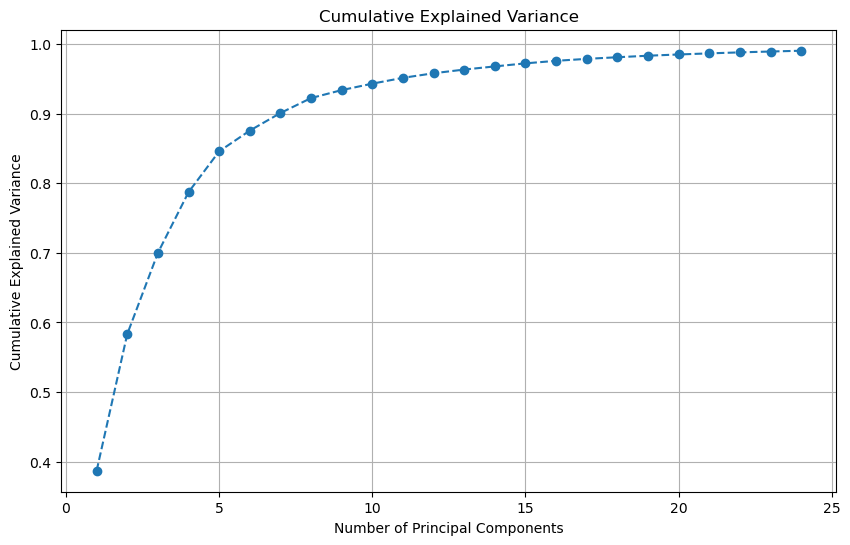

In [264]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example dataset (Replace with your actual dataset)
# Assuming `df` is your dataset, with features in columns and target variable named 'target'
# df = pd.read_csv('your_dataset.csv')

# Step 2: Apply PCA
# Define the number of components to retain, or use `n_components` to retain variance (e.g., 95%)
n_components = 0.99  # Specify number of components to keep
pca = PCA(n_components=n_components)



categorical_vars = X_selected_features.columns[(X_selected_features.nunique() <= 5)]
continous_vars = X_selected_features.columns[(X_selected_features.nunique() > 5)]

X_continous = X_selected_features[continous_vars]

X_pca = pca.fit_transform(X_continous)

# Step 3: Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Step 4: Results
print("Explained Variance Ratio (each component):", explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)

# Step 5: Create a DataFrame with Principal Components
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Combine with the target variable if needed
X_pca_final = pd.concat([X_pca_df, X_selected_features[categorical_vars].reset_index(drop=True)], axis=1)

print("\nShape of dataset before PCA:", X_data.shape)
print("Shape of dataset after PCA:", X_pca_df.shape)

# Optional: Visualize the explained variance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, X_pca.shape[1] + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [285]:
X_pca_final.shape

(390, 38)

# Model Training

Performing GridSearchCV for LinearRegression...


Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\Alvin\miniconda3\envs\MLa2\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for LinearRegression: {}
Best CV MAE: 21.5429
Plotting learning curve for LinearRegression...


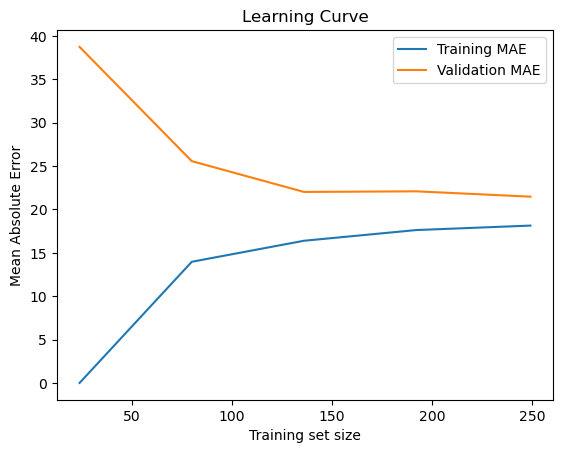

Performing GridSearchCV for RandomForest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for RandomForest: {'regressor__max_depth': 10, 'regressor__n_estimators': 100}
Best CV MAE: 20.5145
Plotting validation curve for RandomForest...


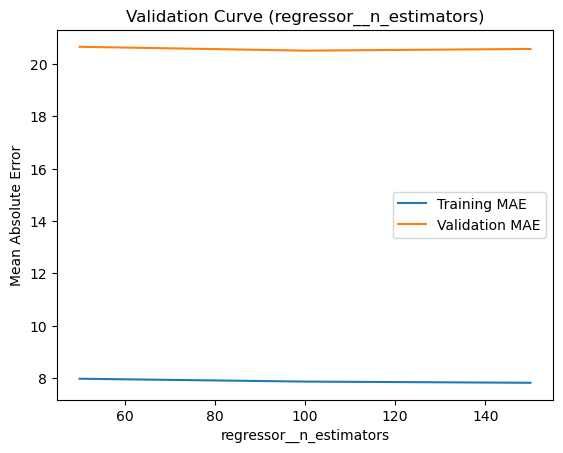

Plotting learning curve for RandomForest...


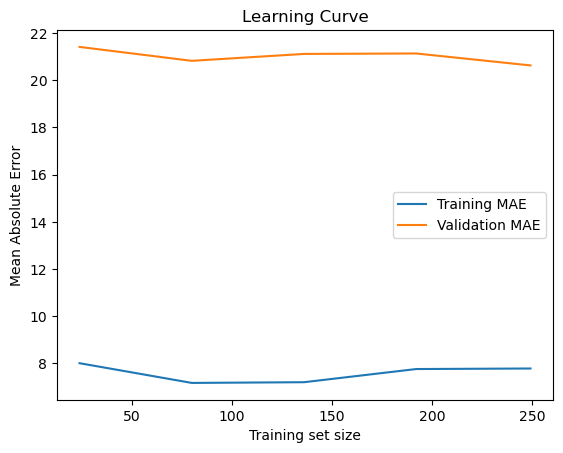

Performing GridSearchCV for GradientBoosting...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters for GradientBoosting: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 15}
Best CV MAE: 20.4649
Plotting validation curve for GradientBoosting...


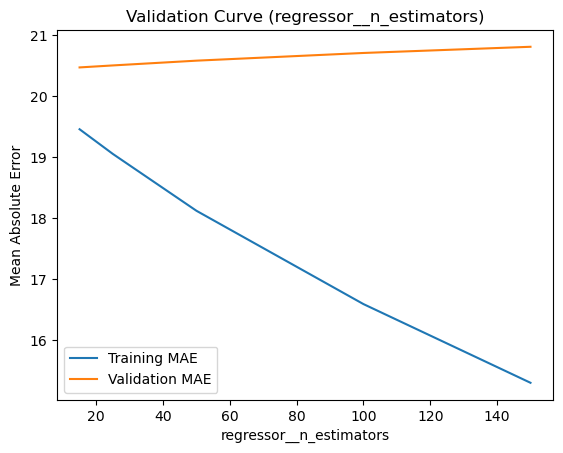

Plotting learning curve for GradientBoosting...


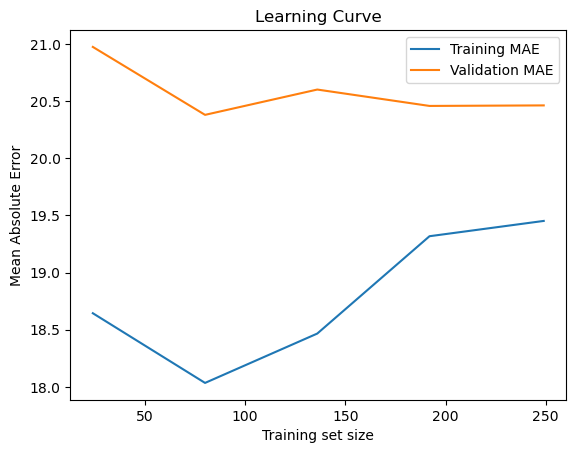

Performing GridSearchCV for AdaBoost...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for AdaBoost: {'regressor__learning_rate': 1, 'regressor__n_estimators': 200}
Best CV MAE: 20.3134
Plotting learning curve for AdaBoost...


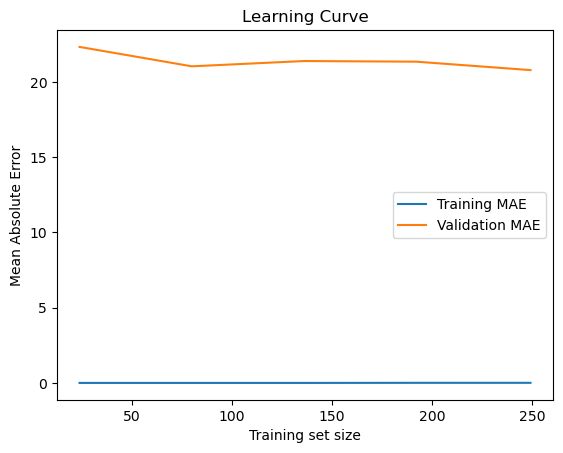

Performing GridSearchCV for SVR...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVR: {'regressor__C': 1, 'regressor__gamma': 'scale'}
Best CV MAE: 20.4470
Plotting validation curve for SVR...


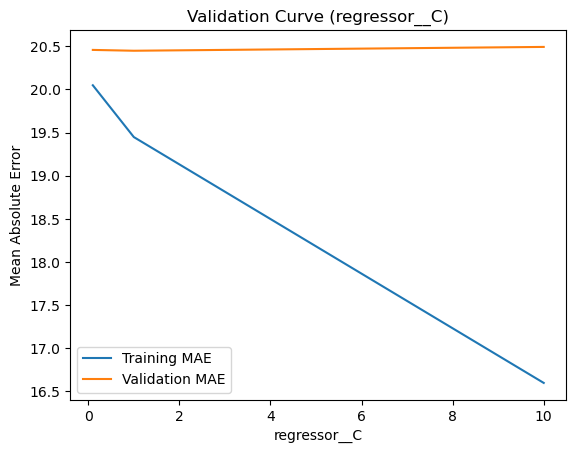

Plotting learning curve for SVR...


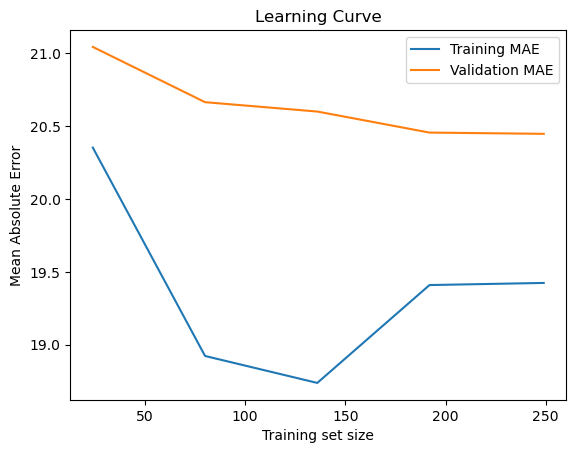

Performing GridSearchCV for KNeighbors...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for KNeighbors: {'regressor__n_neighbors': 7, 'regressor__weights': 'distance'}
Best CV MAE: 21.8602
Plotting validation curve for KNeighbors...


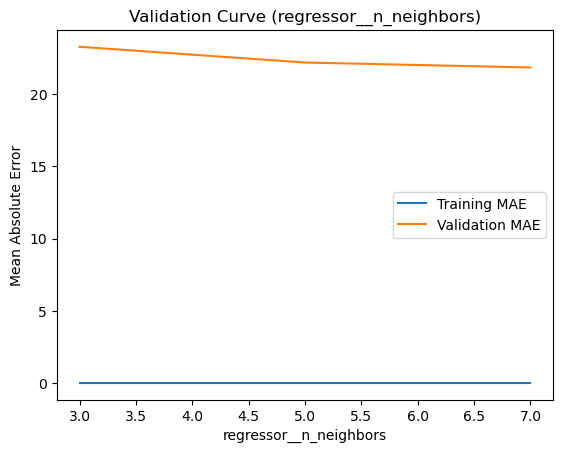

Plotting learning curve for KNeighbors...


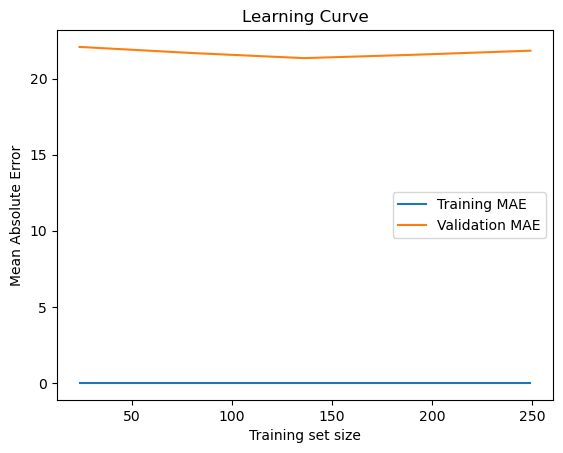

Performing GridSearchCV for DecisionTree...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for DecisionTree: {'regressor__max_depth': 5, 'regressor__min_samples_split': 2}
Best CV MAE: 24.8060
Plotting learning curve for DecisionTree...


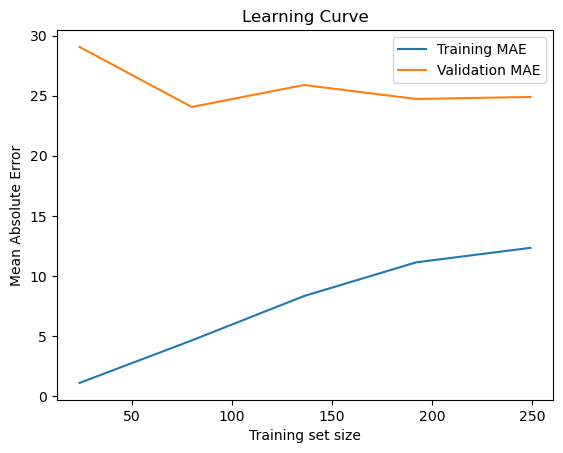

Performing GridSearchCV for MLPRegressor...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\Alvin\miniconda3\envs\MLa2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for MLPRegressor: {'regressor__activation': 'relu', 'regressor__alpha': 0.001, 'regressor__hidden_layer_sizes': (100,)}
Best CV MAE: 20.8407
Plotting learning curve for MLPRegressor...


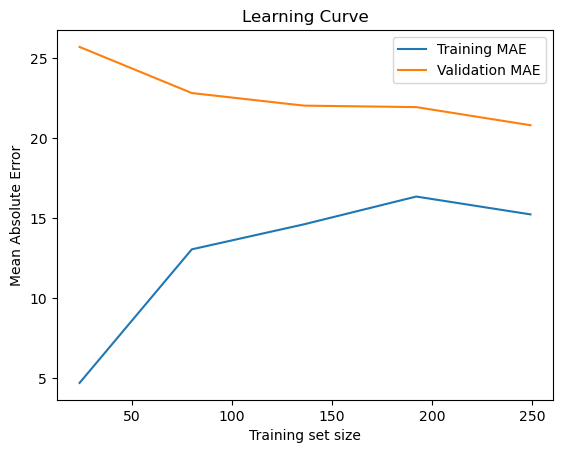

Performing GridSearchCV for XGBoost...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters for XGBoost: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 15}
Best CV MAE: 20.4372
Plotting validation curve for XGBoost...


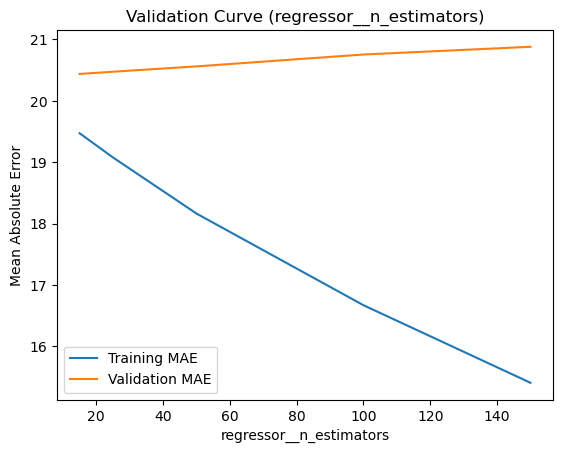

Plotting learning curve for XGBoost...


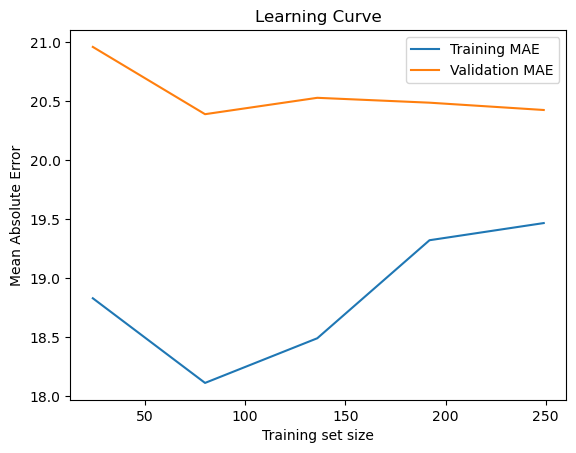

,Model,Best Parameters,Best CV MAE
0,AdaBoost,"{'regressor__learning_rate': 1, 'regressor__n_...",20.313449
1,XGBoost,"{'regressor__learning_rate': 0.01, 'regressor_...",20.437236
2,SVR,"{'regressor__C': 1, 'regressor__gamma': 'scale'}",20.447027
3,GradientBoosting,"{'regressor__learning_rate': 0.01, 'regressor_...",20.464899
4,RandomForest,"{'regressor__max_depth': 10, 'regressor__n_est...",20.514489
5,MLPRegressor,"{'regressor__activation': 'relu', 'regressor__...",20.840750
6,LinearRegression,{},21.542872
7,KNeighbors,"{'regressor__n_neighbors': 7, 'regressor__weig...",21.860247
8,DecisionTree,"{'regressor__max_depth': 5, 'regressor__min_sa...",24.805961


In [266]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV, validation_curve, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import pandas as pd

param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'regressor__n_estimators': [50, 100, 150],
        'regressor__max_depth': [None, 10, 20]
    },
    'GradientBoosting': {
        'regressor__n_estimators': [15, 25, 50, 100, 150],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'regressor__n_estimators': [15, 25, 50, 100, 150, 200],
        'regressor__learning_rate': [0.01, 0.1, 1]
    },
    'SVR': {
        'regressor__C': [0.1, 1, 10],
        'regressor__gamma': ['scale', 'auto']
    },
    'KNeighbors': {
        'regressor__n_neighbors': [3, 5, 7],
        'regressor__weights': ['uniform', 'distance']
    },
    'DecisionTree': {
        'regressor__max_depth': [None, 5, 10],
        'regressor__min_samples_split': [2, 5, 10]
    },
    'MLPRegressor': {
        'regressor__hidden_layer_sizes': [(50,), (100,), (100, 50), (16, 32, 64, 128, 256, 128, 64, 32, 16)],
        'regressor__activation': ['relu', 'tanh'],
        'regressor__alpha': [0.0001, 0.001]
    },
    'XGBoost': {
        'regressor__n_estimators': [15, 25, 50, 100, 150],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5, 7]
    }
}

# Define different regressors
regressors = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'KNeighbors': KNeighborsRegressor(n_neighbors=5),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'MLPRegressor': MLPRegressor(hidden_layer_sizes=(100,), activation='relu', max_iter=500, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# Create pipelines for each regressor
pipelines = {name: Pipeline([('regressor', reg)]) for name, reg in regressors.items()}

# Define a custom scoring metric (Mean Absolute Error in this case)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Function to plot validation curves
def plot_validation_curve(model, X, y, param_name, param_range, scoring, cv=5):
    train_scores, val_scores = validation_curve(
        model,
        X, y,
        param_name=param_name,
        param_range=param_range,
        scoring=scoring,
        cv=cv,
        n_jobs=-1
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)

    plt.figure()
    plt.plot(param_range, train_scores_mean, label="Training MAE")
    plt.plot(param_range, val_scores_mean, label="Validation MAE")
    plt.xlabel(param_name)
    plt.ylabel("Mean Absolute Error")
    plt.title(f"Validation Curve ({param_name})")
    plt.legend()
    plt.show()

# Function to plot learning curves
def plot_learning_curve(model, X, y, scoring, cv=5):
    train_sizes, train_scores, val_scores = learning_curve(
        model,
        X, y,
        train_sizes=np.linspace(0.1, 1.0, 5),
        scoring=scoring,
        cv=cv,
        n_jobs=-1
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, label="Training MAE")
    plt.plot(train_sizes, val_scores_mean, label="Validation MAE")
    plt.xlabel("Training set size")
    plt.ylabel("Mean Absolute Error")
    plt.title("Learning Curve")
    plt.legend()
    plt.show()

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pca_final, y_data, test_size=0.2, random_state=42)

# Store GridSearchCV results
grid_results = {}

# Loop over each pipeline and perform GridSearchCV
for name, pipeline in pipelines.items():
    if name in param_grids:
        print(f"Performing GridSearchCV for {name}...")

        # Define GridSearchCV with the pipeline and parameter grid
        grid_search = GridSearchCV(
            pipeline,
            param_grid=param_grids[name],
            cv=5,
            scoring=mae_scorer,
            n_jobs=-1,
            verbose=1
        )

        # Fit GridSearchCV
        grid_search.fit(X_train, y_train)

        # Save results
        grid_results[name] = {
            'best_params': grid_search.best_params_,
            'best_score': -grid_search.best_score_,  # Convert to positive
            'cv_results': grid_search.cv_results_
        }

        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best CV MAE: {-grid_search.best_score_:.4f}")

        # Plot validation curve for a selected parameter if available
        if name in ['RandomForest', 'GradientBoosting', 'SVR', 'KNeighbors', 'XGBoost']:
            param_name = list(param_grids[name].keys())[0]  # Use the first parameter in the grid for validation curve
            param_range = param_grids[name][param_name]
            model = grid_search.best_estimator_

            print(f"Plotting validation curve for {name}...")
            plot_validation_curve(model, X_train, y_train, param_name, param_range, scoring=mae_scorer)

        # Plot learning curve for the best model
        print(f"Plotting learning curve for {name}...")
        plot_learning_curve(grid_search.best_estimator_, X_train, y_train, scoring=mae_scorer)

# Create a DataFrame from grid_results
results_df = pd.DataFrame([
    {"Model": name, "Best Parameters": result['best_params'], "Best CV MAE": result['best_score']}
    for name, result in grid_results.items()
])

# Sort the DataFrame by Best CV MAE in ascending order
results_df = results_df.sort_values(by="Best CV MAE", ascending=True).reset_index(drop=True)

# Print the sorted DataFrame
results_df


# Performance Evaluation

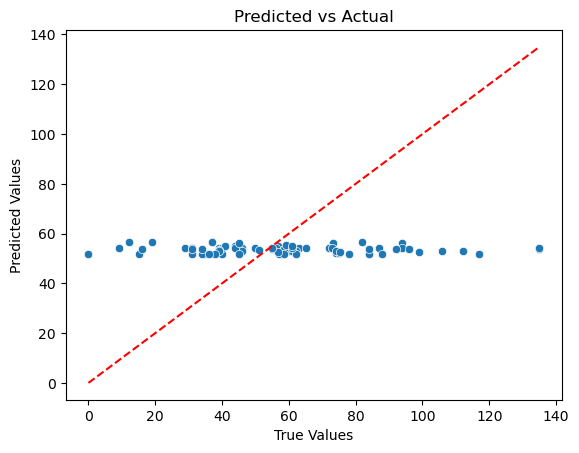

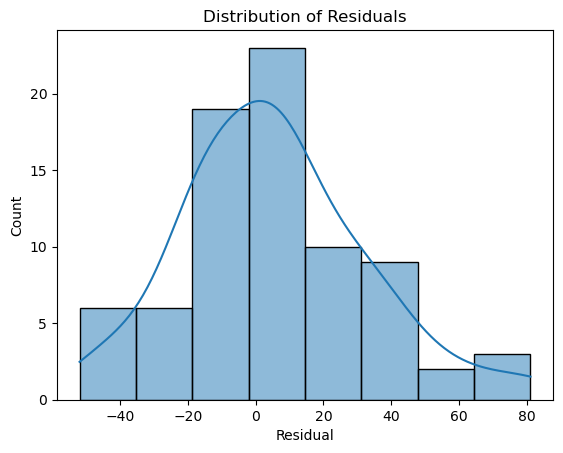

In [267]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

# Plot predicted vs actual
plt.figure()
sns.scatterplot(x=y_val, y=y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.show()

# Plot residuals
residuals = y_val - y_pred
plt.figure()
sns.histplot(residuals, kde=True)
plt.xlabel("Residual")
plt.title("Distribution of Residuals")
plt.show()


,Model,Best MAE,Best Params
3,AdaBoost,20.313449,"{'regressor__learning_rate': 1, 'regressor__n_..."
8,XGBoost,20.437236,"{'regressor__learning_rate': 0.01, 'regressor_..."
4,SVR,20.447027,"{'regressor__C': 1, 'regressor__gamma': 'scale'}"
2,GradientBoosting,20.464899,"{'regressor__learning_rate': 0.01, 'regressor_..."
1,RandomForest,20.514489,"{'regressor__max_depth': 10, 'regressor__n_est..."
7,MLPRegressor,20.840750,"{'regressor__activation': 'relu', 'regressor__..."
0,LinearRegression,21.542872,{}
5,KNeighbors,21.860247,"{'regressor__n_neighbors': 7, 'regressor__weig..."
6,DecisionTree,24.805961,"{'regressor__max_depth': 5, 'regressor__min_sa..."


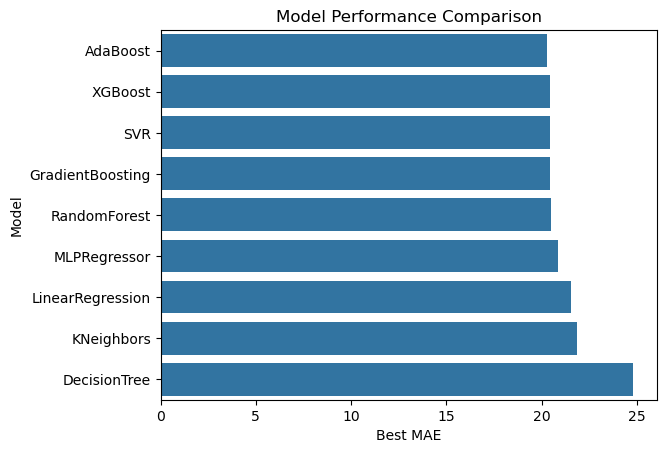

In [268]:
model_summary = pd.DataFrame([
    {'Model': name, 'Best MAE': result['best_score'], 'Best Params': result['best_params']}
    for name, result in grid_results.items()
])
model_summary = model_summary.sort_values(by='Best MAE')
display(model_summary)

# Simple bar plot for model comparison
plt.figure()
sns.barplot(x='Best MAE', y='Model', data=model_summary, orient='h')
plt.title("Model Performance Comparison")
plt.show()


In [269]:
# Create a DataFrame from grid_results with standard deviation of test scores
results_with_std = pd.DataFrame([
    {
        "Model": name,
        "Best Parameters": result['best_params'],
        "Best CV MAE": result['best_score'],
        "Std CV MAE": np.std(result['cv_results']['mean_test_score'])  # Standard deviation of test scores
    }
    for name, result in grid_results.items()
])

# Sort the DataFrame by Best CV MAE in ascending order
results_with_std = results_with_std.sort_values(by="Best CV MAE", ascending=True).reset_index(drop=True)

# Print the DataFrame
results_with_std


,Model,Best Parameters,Best CV MAE,Std CV MAE
0,AdaBoost,"{'regressor__learning_rate': 1, 'regressor__n_...",20.313449,0.389290
1,XGBoost,"{'regressor__learning_rate': 0.01, 'regressor_...",20.437236,0.563934
2,SVR,"{'regressor__C': 1, 'regressor__gamma': 'scale'}",20.447027,0.016580
3,GradientBoosting,"{'regressor__learning_rate': 0.01, 'regressor_...",20.464899,0.560634
4,RandomForest,"{'regressor__max_depth': 10, 'regressor__n_est...",20.514489,0.039179
5,MLPRegressor,"{'regressor__activation': 'relu', 'regressor__...",20.840750,4.708888
6,LinearRegression,{},21.542872,0.000000
7,KNeighbors,"{'regressor__n_neighbors': 7, 'regressor__weig...",21.860247,0.633991
8,DecisionTree,"{'regressor__max_depth': 5, 'regressor__min_sa...",24.805961,1.489905


In [270]:
# import joblib

# filepath = "bestModelRegression_v2.pkl"
# joblib.dump(best_model, filepath)

In [271]:
# joblib.dump(list(X_selected_features.columns), filepath)

In [272]:
import joblib
joblib.dump(transformer, 'power_transformer.joblib')
joblib.dump(scaler, 'standard_scaler.joblib')


['standard_scaler.joblib']

In [273]:
joblib.dump(list(X_pca_final.columns), "selected_features.joblib")

['selected_features.joblib']

In [284]:
joblib.dump(list(X_selected_features.columns), "X_selected_features.joblib")

['X_selected_features.joblib']

In [274]:
# Load the saved transformers
loaded_power_transformer = joblib.load('power_transformer.joblib')
loaded_standard_scaler = joblib.load('standard_scaler.joblib')

loaded_standard_scaler

StandardScaler()

In [275]:

filepath = "skewed_columns.joblib"
joblib.dump(skewed_columns, filepath)

['skewed_columns.joblib']

In [276]:
skewed_columns = joblib.load('skewed_columns.joblib')
skewed_columns

Index(['original_shape_LeastAxisLength', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength', 'original_shape_SurfaceArea',
       'original_shape_VoxelVolume', 'original_firstorder_90Percentile',
       'original_firstorder_Energy', 'original_firstorder_Kurtosis',
       'original_firstorder_Maximum', 'original_firstorder_Range',
       'original_firstorder_RootMeanSquared',
       'original_firstorder_TotalEnergy', 'original_firstorder_Variance',
       'original_glcm_Autocorrelation', 'original_glcm_ClusterProminence',
       'original_glcm_ClusterTendency', 'original_glcm_Correlation',
       'original_glcm_Imc1', 'original_glcm_JointAverage', 'original_glcm_MCC',
       'original_glcm_MaximumProbability', 'original_glcm_SumAverage',
       'origina

In [277]:
loaded_power_transformer

PowerTransformer(standardize=False)

In [278]:


# import joblib

filepath = "pca_model.joblib"
joblib.dump(pca, filepath)

['pca_model.joblib']

In [279]:

filepath = "best_model.joblib"
joblib.dump(best_model, filepath)

['best_model.joblib']

In [280]:
# filepath = "features_list_v2.json"
# joblib.dump(list(X_selected_features.columns), filepath)

In [281]:
# X_selected_features.to_csv("X_selected_features_regression_v2.csv", index=False)
# y_data.to_csv("y_RFS_regression_v2.csv", index=False)

In [282]:
# y_data

In [283]:
# list(X_selected_features.columns)